In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression

import re

In [2]:
df = pd.read_csv('electriccars.csv')

In [3]:
df.head(2)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"


In [4]:
df.shape

(180, 11)

In [5]:
df.isna().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
dtype: int64

In [6]:
# extract numeric data
def extract_num(x):
    """
    this function extracts the numeric data from the string 
    and converts the data type to float. 
    It uses a regex to extact intergers and floats.
    """
    return float(re.findall(r"[-+]?\d*\.?\d+|\d+", x)[0])

In [7]:
df['Acceleration'][0]

'7.3 sec'

In [8]:
print(extract_num(df['Acceleration'][0]))
print(type(extract_num(df['Acceleration'][0])))

7.3
<class 'float'>


In [9]:
df['BatteryCapacity'] = df['Subtitle'].apply(extract_num)

In [10]:
# extract brand name from name
df['BrandName'] = df['Name'].apply(lambda x: x.split()[0])

In [11]:
for col_name in ['Acceleration', 'TopSpeed', 'Range', 'Efficiency']:
    df[col_name] = df[col_name].apply(extract_num)

In [12]:
df.drop(columns=['PriceinUK', 'Subtitle'] , axis=1, inplace=True)

In [13]:
df['PriceinGermany'] = df['PriceinGermany']\
                                           .fillna('-1')\
                                           .apply(lambda x: re.sub(',', '', x))\
                                           .apply(extract_num)\
                                           .replace(-1, np.nan)

In [14]:
FastChargeSpeed=[]
for item in df['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df['FastChargeSpeed']=FastChargeSpeed

In [15]:
df['FastChargeSpeed'] = df['FastChargeSpeed'].replace(0, np.nan)

In [16]:
df.head(2)

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,BatteryCapacity,BrandName
0,Opel Ampera-e,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,42990.0,58.0,Opel
1,Renault Kangoo Maxi ZE 33,22.4,130.0,160.0,194.0,NaN,Front Wheel Drive,5,NaN,31.0,Renault


In [17]:
# datatypes of cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   Acceleration     180 non-null    float64
 2   TopSpeed         180 non-null    float64
 3   Range            180 non-null    float64
 4   Efficiency       180 non-null    float64
 5   FastChargeSpeed  175 non-null    float64
 6   Drive            180 non-null    object 
 7   NumberofSeats    180 non-null    int64  
 8   PriceinGermany   168 non-null    float64
 9   BatteryCapacity  180 non-null    float64
 10  BrandName        180 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 15.6+ KB


In [18]:
# shape of cleaned dataset
df.shape

(180, 11)

In [19]:
df1 = df.dropna()

In [20]:
df1.shape

(164, 11)

In [21]:
df1.isnull().sum()

Name               0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     0
BatteryCapacity    0
BrandName          0
dtype: int64

In [22]:
df1.head(2)

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,BatteryCapacity,BrandName
0,Opel Ampera-e,7.3,150.0,335.0,173.0,210.0,Front Wheel Drive,5,42990.0,58.0,Opel
2,Nissan Leaf,7.9,144.0,220.0,164.0,230.0,Front Wheel Drive,5,29990.0,36.0,Nissan


In [23]:
cars = df1.drop_duplicates()

In [24]:
cars.shape

(163, 11)

In [25]:
cars.Name = cars.Name.str.strip()

C:\Users\atlab\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
cars_1 = cars.rename(columns = {"Acceleration": "acceleration_in_sec", 
                                "Range": "range_km", 
                                "TopSpeed": "top_speed_km_h",
                                "Efficiency": "efficiency_Wh_km",
                                "FastChargeSpeed": "fast_charge_speed_km_h",
                                "PriceinGermany": "price_in_euros",
                                "BatteryCapacity": "batter_capacity_kWh"
                               })

<AxesSubplot:>

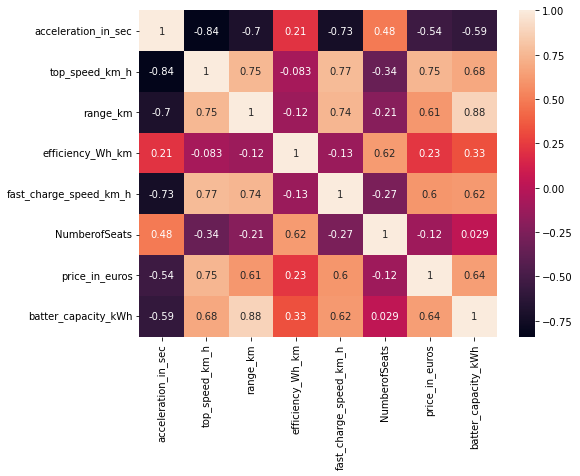

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(cars_1.corr(), annot=True)

* Battery Capacity is correlated with Range. Range is a more relevant metric than Capacity.

* Top Speed is highly correlated (negatively) with Acceleration.

In [60]:
cars_1.corr()

,acceleration_in_sec,top_speed_km_h,range_km,efficiency_Wh_km,fast_charge_speed_km_h,NumberofSeats,price_in_euros,batter_capacity_kWh
acceleration_in_sec,1.000000,-0.839352,-0.699885,0.212518,-0.731755,0.483750,-0.537946,-0.594831
top_speed_km_h,-0.839352,1.000000,0.753048,-0.082835,0.769126,-0.343754,0.745753,0.678486
range_km,-0.699885,0.753048,1.000000,-0.124378,0.744918,-0.207657,0.610508,0.880687
efficiency_Wh_km,0.212518,-0.082835,-0.124378,1.000000,-0.128559,0.622636,0.225910,0.325553
fast_charge_speed_km_h,-0.731755,0.769126,0.744918,-0.128559,1.000000,-0.266027,0.603905,0.617803
NumberofSeats,0.483750,-0.343754,-0.207657,0.622636,-0.266027,1.000000,-0.119905,0.029116
price_in_euros,-0.537946,0.745753,0.610508,0.225910,0.603905,-0.119905,1.000000,0.638697
batter_capacity_kWh,-0.594831,0.678486,0.880687,0.325553,0.617803,0.029116,0.638697,1.000000


* We can see strong positive correlation between price and range. 
* But we can see two negative strong correlations: accelration and range , price and acceleration. 
* It means that when acceleration decreases price increases. But it also means that when range increases acceleration decreases.

Text(0, 0.5, 'price')

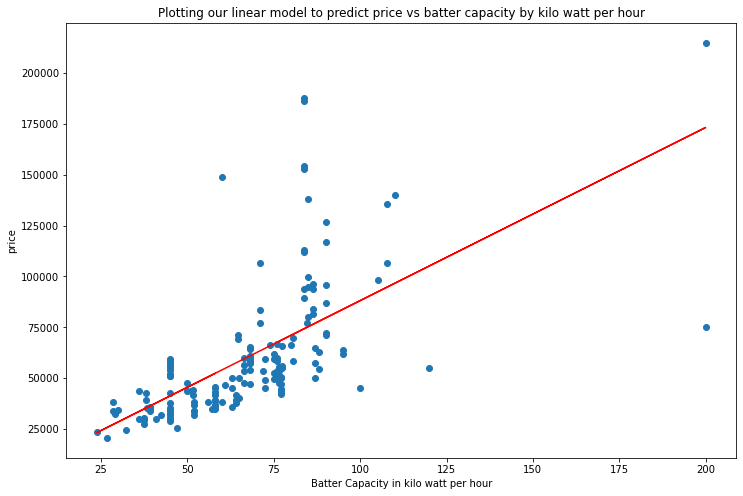

In [28]:
pred_vars = ['batter_capacity_kWh']
X = np.array(cars_1[pred_vars]).reshape(-1, 1)
y = cars_1['price_in_euros']

lm = LinearRegression()
lm.fit(X, y)

price_preds = lm.predict(X)

fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(X, y)
plt.plot(X, price_preds, color='red')

ax.set_title('Plotting our linear model to predict price vs batter capacity by kilo watt per hour')
ax.set_xlabel('Batter Capacity in kilo watt per hour')
ax.set_ylabel('price')

In [29]:
lm.coef_

array([851.93049777])

In [30]:
lm.intercept_

2889.0870198171688

Text(0, 0.5, 'price')

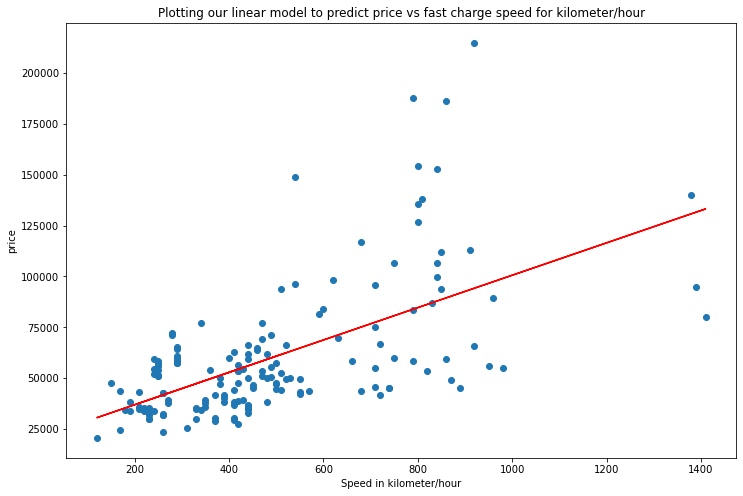

In [31]:
pred_vars = ['fast_charge_speed_km_h']
X = np.array(cars_1[pred_vars]).reshape(-1, 1)
y = cars_1['price_in_euros']

lm = LinearRegression()
lm.fit(X, y)

price_preds = lm.predict(X)

fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(X, y)
plt.plot(X, price_preds, color='red')

ax.set_title('Plotting our linear model to predict price vs fast charge speed for kilometer/hour')
ax.set_xlabel('Speed in kilometer/hour')
ax.set_ylabel('price')

In [32]:
lm.coef_

array([79.63413575])

In [33]:
lm.intercept_

20943.492367318373

Text(0, 0.5, 'price')

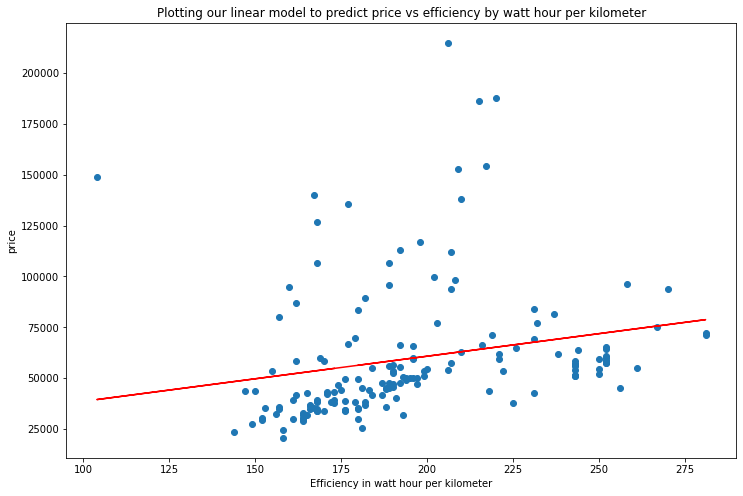

In [34]:
pred_vars = ['efficiency_Wh_km']
X = np.array(cars_1[pred_vars]).reshape(-1, 1)
y = cars_1['price_in_euros']

lm = LinearRegression()
lm.fit(X, y)

price_preds = lm.predict(X)

fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(X, y)
plt.plot(X, price_preds, color='red')

ax.set_title('Plotting our linear model to predict price vs efficiency by watt hour per kilometer')
ax.set_xlabel('Efficiency in watt hour per kilometer')
ax.set_ylabel('price')

In [35]:
lm.coef_

array([222.14045367])

In [37]:
lm.intercept_

16314.0984011736

Text(0.5, 1.0, 'German Electric Vechicles Distribution')

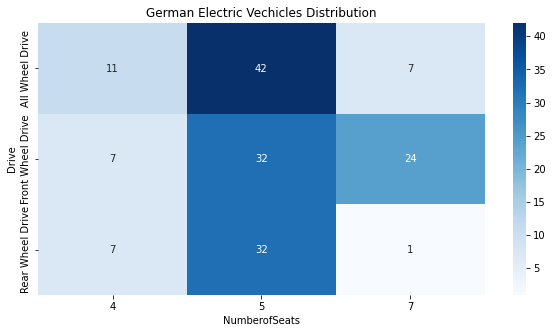

In [57]:
fig, ax = plt.subplots(figsize = (10, 5),sharey=True)
sns.heatmap(cars_1.pivot_table('price_in_euros','Drive','NumberofSeats',aggfunc='count'),cmap='Blues',annot=True,)
ax.set_title('German Electric Vechicles Distribution')

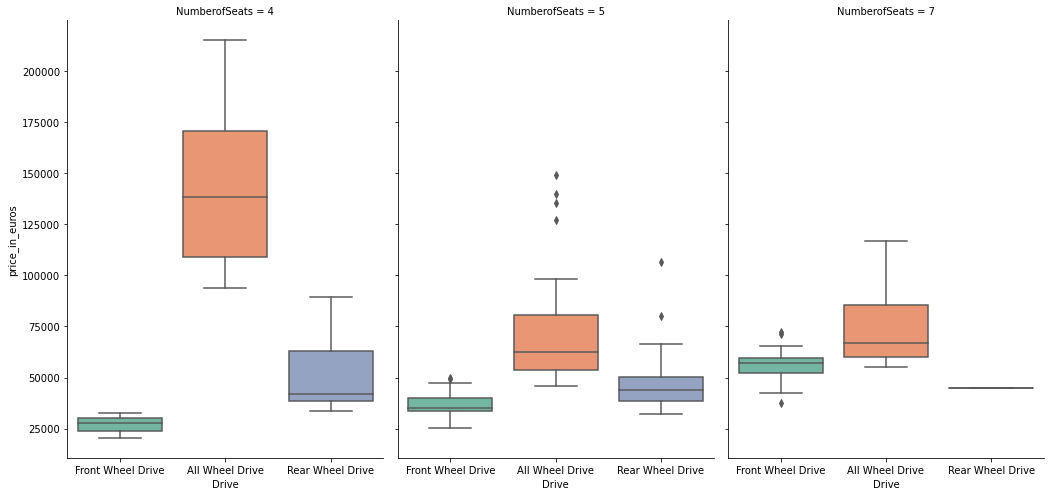

In [55]:
sns.catplot(data=cars_1,y='price_in_euros',x='Drive',col='NumberofSeats',kind='box',height=7,aspect=0.7,palette='Set2')

* The Most expensive electric cars are 4 seater, All wheel drives and have the widest range of price options